<h1 style="text-align:center;">LAB 3</h1>
<h1 style="text-align:center;">Morphological Operations</h1>
<h3 style="text-align:left; color:blue;">Student Name:</h3>
<h3 style="text-align:left; color:blue;">Student ID:</h3>

<h2 style="text-align:left; color:black;">Introduction</h2>

Morphology is a comprehensive set of image processing operations that process images based on shapes. Morphological operations apply a structuring element to an input image, creating an output image of the same size. In a morphological operation, the value of each pixel in the output image is based on a comparison of the corresponding pixel in the input image with its neighbors.

<h2 style="text-align:left; color:black;">Objective</h2>

In this lab, you'll apply different basic and advanced morphological operation to images. These operations are:</br>
* Dilation.
* Erosion.
* Opening.
* Closing.
* Hit and Miss.
* Boundary Extraction.
* Region Filling.
* Connected Components.

<h2 style="text-align:left; color:black;">Instructions</h2>

In [1]:
# Import the needed libraries
import cv2
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

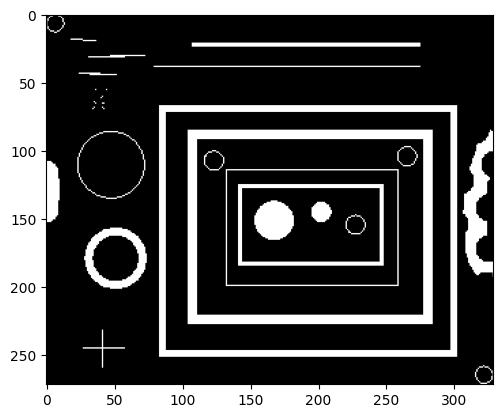

In [2]:
# Read a binary image and display it
binary_image = cv2.imread("image 1.png", cv2.IMREAD_GRAYSCALE)
plt.imshow(binary_image, cmap="gray")

In [3]:
# Create a 3x3 structuring element (SE)
SE = np.ones(shape=(3,3),dtype=np.uint8)
print(SE)

[[1 1 1]
 [1 1 1]
 [1 1 1]]


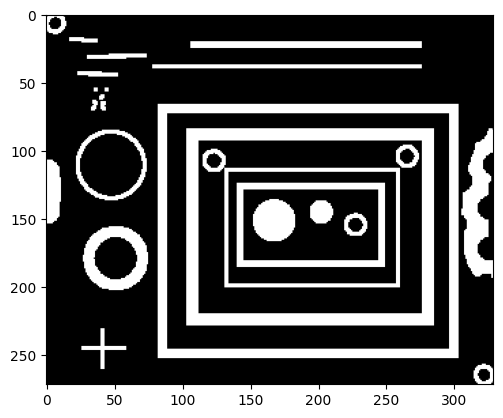

In [4]:
# Apply dilation to the binary image using the created SE
dilated_image = cv2.dilate(src=binary_image,kernel=SE, iterations=1)
plt.imshow(dilated_image, cmap="gray")

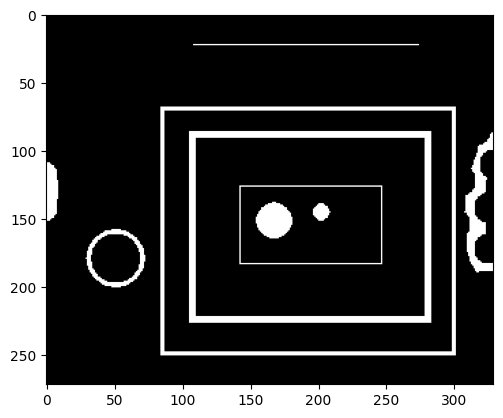

In [5]:
# Apply erosion to the binary image using the same SE
eroded_image = cv2.erode(src=binary_image,kernel=SE, iterations=1)
plt.imshow(eroded_image, cmap="gray")

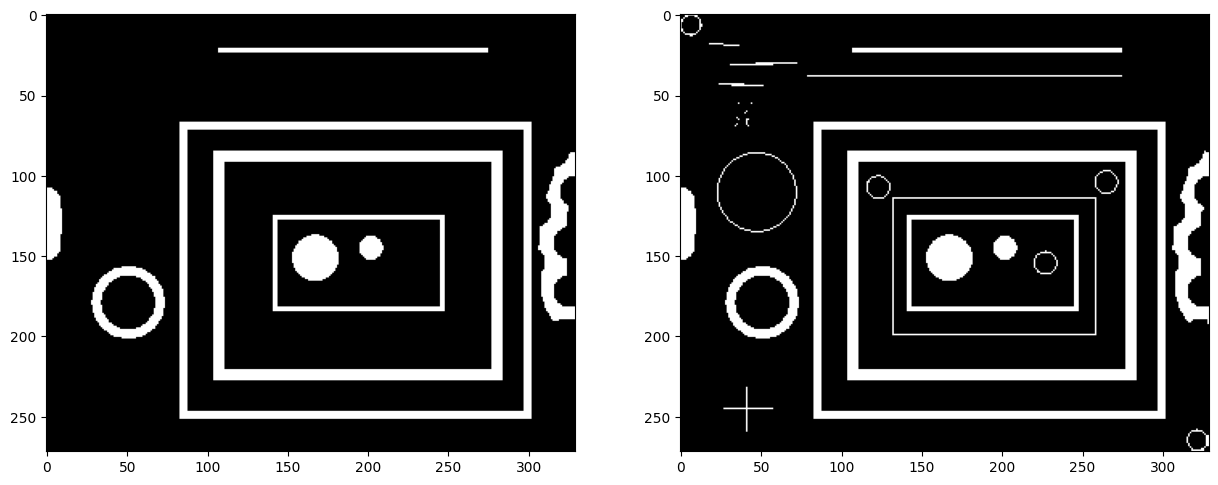

In [6]:
# Apply opening and closing using the same SE
opened_image = cv2.morphologyEx(src=binary_image, op=cv2.MORPH_OPEN, kernel=SE, iterations=1)
plt.subplots(1, 2, figsize=(15, 15))
plt.subplot(1,2,1)
plt.imshow(opened_image, cmap="gray")
closed_image = cv2.morphologyEx(src=binary_image, op=cv2.MORPH_CLOSE, kernel=SE, iterations=1)
plt.subplot(1,2,2)
plt.imshow(closed_image, cmap="gray")

[[-1 -1 -1]
 [-1  1 -1]
 [-1 -1 -1]]


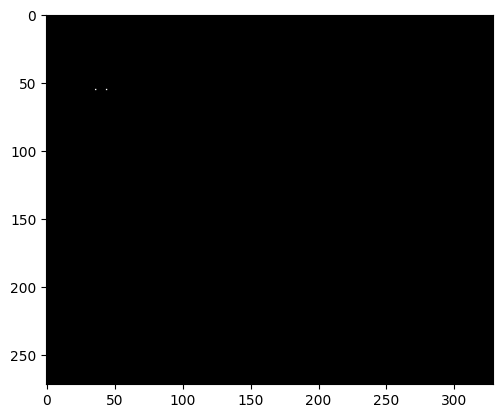

In [7]:
# Apply Hit and Miss to detect isolated points
# Create a SE for hit or miss, replace pixels of foreground by 1 and pixels of background by -1
SE2 = np.zeros(shape=(3, 3), dtype=np.int8) - 1
SE2[1,1] = 1
print (SE2)
hit_miss_image = cv2.morphologyEx(src=binary_image, op=cv2.MORPH_HITMISS, kernel=SE2, iterations=1)
plt.imshow(hit_miss_image, cmap="gray")

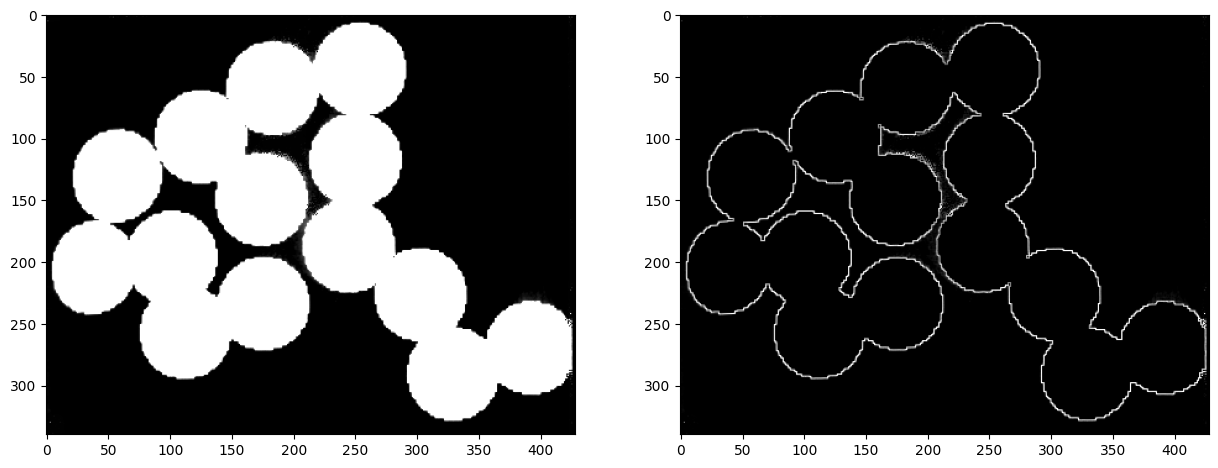

In [8]:
# Apply boundary extraction
binary_image2 = 255 - cv2.imread("spheres.png", cv2.IMREAD_GRAYSCALE)
plt.subplots(1, 2, figsize=(15, 15))
plt.subplot(1,2,1)
plt.imshow(binary_image2, cmap="gray")

eroded_image2 = cv2.erode(src=binary_image2, kernel=SE, iterations=1)
boundary_extraction = binary_image2 - eroded_image2

plt.subplot(1,2,2)
plt.imshow(boundary_extraction, cmap="gray")

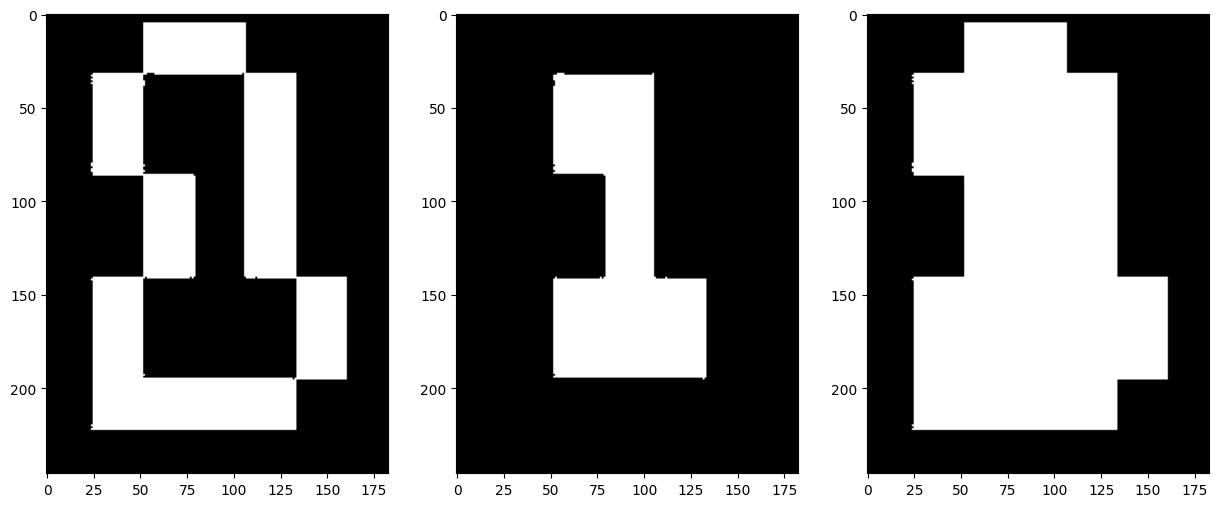

In [9]:
binary_image3 = cv2.imread("region_filling.jpg", cv2.IMREAD_GRAYSCALE)
threshold, binary_image3 = cv2.threshold(src=binary_image3, thresh=127, maxval=1, type=cv2.THRESH_BINARY)
# Apply region filling algorithm to fill a shape in the image starting from point [50,92]
plt.subplots(1, 3, figsize=(15, 15))
plt.subplot(1,3,1)
plt.imshow(binary_image3, cmap="gray")

SE3 = cv2.getStructuringElement(shape=cv2.MORPH_CROSS, ksize=(25, 25))

# Define a point in the region to be filled and set it to 255
Xk = np.zeros(shape=binary_image3.shape, dtype= np.uint8)
Xk[50,92] = 1
Xk_1 = np.zeros(shape=binary_image3.shape, dtype= np.uint8)
# Get the image complement
binary_image3_C = (1 - binary_image3)

# Apply the algorithm
while not np.array_equal(Xk, Xk_1):
    Xk_1 = Xk
    # logical_and is equivalent to the intersection operation of set
    Xk = np.logical_and(cv2.dilate(src=Xk_1 ,kernel=SE3, iterations=1) ,binary_image3_C).astype(np.uint8)

region_filled = 255 * Xk
region_filled_image = region_filled + 255 * binary_image3
plt.subplot(1,3,2)
plt.imshow(region_filled, cmap="gray")
plt.subplot(1,3,3)
plt.imshow(region_filled_image, cmap="gray")

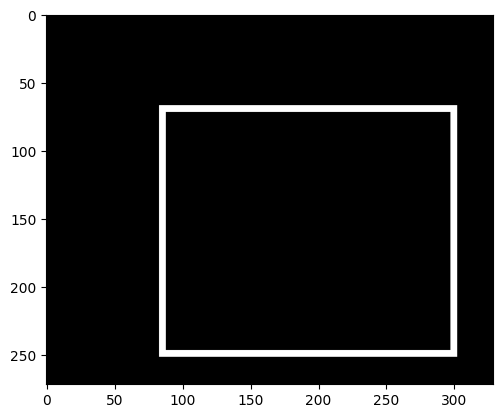

In [10]:
# Apply connected components algorithm to binary_image starting from point [100,83]
SE4 = cv2.getStructuringElement(shape=cv2.MORPH_RECT, ksize=(5, 5))

# Define a point on the connected component to be detected (the bigger rectangle)
Xz = np.zeros(shape=binary_image.shape, dtype= np.uint8)
Xz[100,83] = 1
Xz_1 = np.zeros(shape=binary_image.shape, dtype=np.uint8)
threshold, binary_image = cv2.threshold(src=binary_image, thresh=127, maxval=1, type=cv2.THRESH_BINARY)

# Apply the algorithm
while not np.array_equal(Xz, Xz_1):
    Xz_1 = Xz
    Xz = np.logical_and(cv2.dilate(src=Xz_1 ,kernel=SE4, iterations=1), binary_image).astype(np.uint8)

connected_component = 255 * Xz
plt.imshow(connected_component, cmap="gray")